<a href="https://colab.research.google.com/github/shameer-phy/ML/blob/main/Hackathons/segmind/segmind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1]:
from google.colab import drive 

drive.mount("/content/gdrive") 

Mounted at /content/gdrive


In [7]:
# Lets read the training dataset and tes dataset

df = pd.read_csv('/content/gdrive/My Drive/Datasets/segmind/TRAIN.csv')
 
df_test = pd.read_csv('/content/gdrive/My Drive/Datasets/segmind/TEST.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.shape

(712046, 9)

In [ ]:
df_test.shape

(305163, 7)

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [ ]:
df.head()
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
712041,342,2,2013-10-01,10182,836,1,0,0,0
712042,343,2,2013-10-01,5352,588,1,0,0,0
712043,344,2,2013-10-01,6652,1043,1,0,0,1
712044,345,2,2013-10-01,3842,475,1,0,0,0
712045,346,2,2013-10-01,6143,599,1,0,0,0


In [ ]:
print(df.shape)
df.nunique()

(712046, 9)


Store             1115
DayOfWeek            7
Date               669
Sales            20727
Customers         3956
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [9]:
df.StateHoliday.value_counts()

0    557868
0    131072
a     14546
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [10]:
df['StateHoliday'] = df['StateHoliday'].str.strip()

In [11]:
df.StateHoliday.value_counts()

0    557868
a     14546
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
df_cp1 = df.copy()
dftest_cp1 = df_test.copy()

In [13]:
def convdt(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Day'] = df['Date'].dt.day
  df = df.drop('Date',axis=1)
def output(yp,name):
  #function to write report
  report = pd.DataFrame(yp,columns=['Sales'])
  report.to_csv('/content/gdrive/My Drive/Datasets/segmind/' + name )

In [14]:
df_cp1.head()
convdt(df_cp1)
df_cp1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [15]:
df_cp1 = df_cp1.drop('Date',axis=1)

In [16]:
df_cp1.nunique()
num_cols = ['Store', 'Sales', 'Customers']

In [17]:
df_cp2 = pd.get_dummies(df_cp1,columns=[x for x in df_cp1.columns if x not in num_cols])

In [ ]:
df_cp2.head()

,Store,Sales,Customers,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Date_2013-10-01 00:00:00,Date_2013-10-02 00:00:00,Date_2013-10-03 00:00:00,Date_2013-10-04 00:00:00,Date_2013-10-05 00:00:00,Date_2013-10-06 00:00:00,Date_2013-10-07 00:00:00,Date_2013-10-08 00:00:00,Date_2013-10-09 00:00:00,Date_2013-10-10 00:00:00,Date_2013-10-11 00:00:00,Date_2013-10-12 00:00:00,Date_2013-10-13 00:00:00,Date_2013-10-14 00:00:00,Date_2013-10-15 00:00:00,Date_2013-10-16 00:00:00,Date_2013-10-17 00:00:00,Date_2013-10-18 00:00:00,Date_2013-10-19 00:00:00,Date_2013-10-20 00:00:00,Date_2013-10-21 00:00:00,Date_2013-10-22 00:00:00,Date_2013-10-23 00:00:00,Date_2013-10-24 00:00:00,Date_2013-10-25 00:00:00,Date_2013-10-26 00:00:00,Date_2013-10-27 00:00:00,Date_2013-10-28 00:00:00,Date_2013-10-29 00:00:00,Date_2013-10-30 00:00:00,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,1,5263,555,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,6064,625,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,8314,821,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,13995,1498,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,4822,559,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_cp2.corr()

,Store,Sales,Customers,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1,Year_2013,Year_2014,Year_2015,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
Store,1.000000,0.003725,0.023597,0.000231,-0.001400,0.000255,0.000224,0.000224,0.000231,0.000231,0.000475,-0.000475,-0.000540,0.000540,0.000502,-0.000825,0.000994,-0.000105,0.000173,-0.001498,0.001498,-0.002200,0.002425,-0.000936,-0.000436,-0.000412,-0.000436,-0.000428,-0.000436,-0.000428,0.000712,0.001354,0.001331,-0.001326,0.000699,0.000712,-0.003191,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000133,0.000133,0.000115
Sales,0.003725,1.000000,0.893174,0.221302,0.136684,0.084675,0.040731,0.093754,0.009815,-0.587994,-0.681612,0.681612,-0.453403,0.453403,-0.016794,0.128743,-0.205723,-0.114525,-0.110763,-0.077300,0.077300,0.013357,-0.010408,0.001109,-0.023412,-0.011978,-0.008819,-0.000465,-0.026752,0.005611,0.016398,-0.011705,-0.000361,-0.027090,0.010673,0.076255,-0.048035,0.068201,0.007207,0.052913,0.031185,0.007983,0.020370,-0.019940,-0.028978,-0.017420,-0.019141,-0.041256,-0.006083,-0.012680,0.001304,0.041719,0.036156,0.029480,0.000981,0.021325,-0.013688,-0.026110,-0.006322,-0.036847,-0.065262,-0.069278,-0.008034,0.008656,0.003181,0.081900,0.012650
Customers,0.023597,0.893174,1.000000,0.162377,0.117113,0.078964,0.048161,0.091197,0.023551,-0.522384,-0.619465,0.619465,-0.315534,0.315534,0.004259,0.096577,-0.183033,-0.101769,-0.099227,-0.066068,0.066068,0.010941,0.011879,-0.020730,-0.021260,-0.004044,-0.008170,-0.002886,-0.024339,-0.004680,0.010619,0.000375,0.011909,-0.005399,0.010615,0.043499,-0.054808,0.045454,-0.007419,0.035640,0.015671,0.001828,0.018092,-0.012185,-0.016335,-0.001613,-0.000248,-0.022972,0.002571,-0.008049,-0.003091,0.024301,0.024979,0.018584,-0.002470,0.016744,-0.008676,-0.014523,0.006693,-0.018735,-0.043877,-0.050267,-0.002098,0.007258,-0.004601,0.054123,0.001930
DayOfWeek_1,0.000231,0.221302,0.162377,1.000000,-0.165916,-0.166649,-0.166820,-0.166820,-0.165758,-0.165758,-0.133768,0.133768,-0.130950,0.130950,0.007762,-0.021788,0.013381,0.081340,-0.030983,-0.066071,0.066071,0.000214,0.001143,-0.001371,-0.012353,0.000593,0.017935,-0.008165,-0.012353,0.022570,-0.011793,-0.007760,0.014193,-0.010307,-0.007796,0.017122,-0.005495,0.025365,-0.003815,-0.003815,-0.024884,0.021309,-0.003815,-0.007871,0.025365,-0.003815,-0.003815,-0.024884,0.021309,-0.003815,-0.007871,0.025365,-0.003815,-0.003815,-0.024884,0.021309,-0.003815,-0.007871,0.025365,-0.003815,-0.003815,-0.024884,0.021309,-0.003815,-0.000763,0.007751,-0.024631
DayOfWeek_2,-0.001400,0.136684,0.117113,-0.165916,1.000000,-0.166808,-0.166980,-0.166980,-0.165916,-0.165916,-0.180672,0.180672,-0.128848,0.128848,0.007439,0.022092,-0.050073,-0.032354,-0.031013,-0.074312,0.074312,0.003913,-0.001007,-0.001841,-0.012563,0.000386,0.002570,0.006983,-0.012563,0.006983,0.001185,-0.007892,0.014049,-0.005604,-0.007996,0.016901,-0.019091,-0.007989,0.025224,-0.003936,-0.003936,-0.024990,0.021171,-0.003936,-0.007989,0.025224,-0.003936,-0.003936,-0.024990,0.021171,-0.003936,-0.007989,0.025224,-0.003936,-0.003936,-0.024990,0.021171,-0.003936,-0.007989,0.025224,-0.003936,-0.003936,-0.024990,0.021171,0.003375,-0.000879,0.007823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

##Lets split X, Y and Train and test sets

In [18]:
X = df_cp2.drop('Sales',axis=1)
Y = df_cp2['Sales']

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [20]:
X_std = pd.DataFrame(X_std,columns=X.columns)
X_std.head()

,Store,Customers,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0,SchoolHoliday_1,Year_2013,Year_2014,Year_2015,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,-1.731330,-0.177129,-0.407134,-0.407523,-0.409323,-0.409743,2.440551,-0.407134,-0.407134,-0.454854,0.454854,-1.275707,1.275707,0.525709,-0.144411,-0.079392,-0.076101,-2.192785,2.192785,-0.408459,-1.051406,1.418553,-0.327911,-0.310032,-0.327911,-0.322021,-0.327911,-0.322021,3.194448,-0.205995,-0.202507,-0.310959,-0.307467,-0.313043,-0.181387,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.175262,-0.175262,7.119774
1,-1.728224,-0.027699,-0.407134,-0.407523,-0.409323,-0.409743,2.440551,-0.407134,-0.407134,-0.454854,0.454854,-1.275707,1.275707,0.525709,-0.144411,-0.079392,-0.076101,-2.192785,2.192785,-0.408459,-1.051406,1.418553,-0.327911,-0.310032,-0.327911,-0.322021,-0.327911,-0.322021,3.194448,-0.205995,-0.202507,-0.310959,-0.307467,-0.313043,-0.181387,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.175262,-0.175262,7.119774
2,-1.725118,0.390706,-0.407134,-0.407523,-0.409323,-0.409743,2.440551,-0.407134,-0.407134,-0.454854,0.454854,-1.275707,1.275707,0.525709,-0.144411,-0.079392,-0.076101,-2.192785,2.192785,-0.408459,-1.051406,1.418553,-0.327911,-0.310032,-0.327911,-0.322021,-0.327911,-0.322021,3.194448,-0.205995,-0.202507,-0.310959,-0.307467,-0.313043,-0.181387,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.175262,-0.175262,7.119774
3,-1.722012,1.835910,-0.407134,-0.407523,-0.409323,-0.409743,2.440551,-0.407134,-0.407134,-0.454854,0.454854,-1.275707,1.275707,0.525709,-0.144411,-0.079392,-0.076101,-2.192785,2.192785,-0.408459,-1.051406,1.418553,-0.327911,-0.310032,-0.327911,-0.322021,-0.327911,-0.322021,3.194448,-0.205995,-0.202507,-0.310959,-0.307467,-0.313043,-0.181387,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.175262,-0.175262,7.119774
4,-1.718906,-0.168590,-0.407134,-0.407523,-0.409323,-0.409743,2.440551,-0.407134,-0.407134,-0.454854,0.454854,-1.275707,1.275707,0.525709,-0.144411,-0.079392,-0.076101,-2.192785,2.192785,-0.408459,-1.051406,1.418553,-0.327911,-0.310032,-0.327911,-0.322021,-0.327911,-0.322021,3.194448,-0.205995,-0.202507,-0.310959,-0.307467,-0.313043,-0.181387,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.184539,-0.175262,-0.175262,7.119774


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38a9c62dd0>,
      dtype=object)

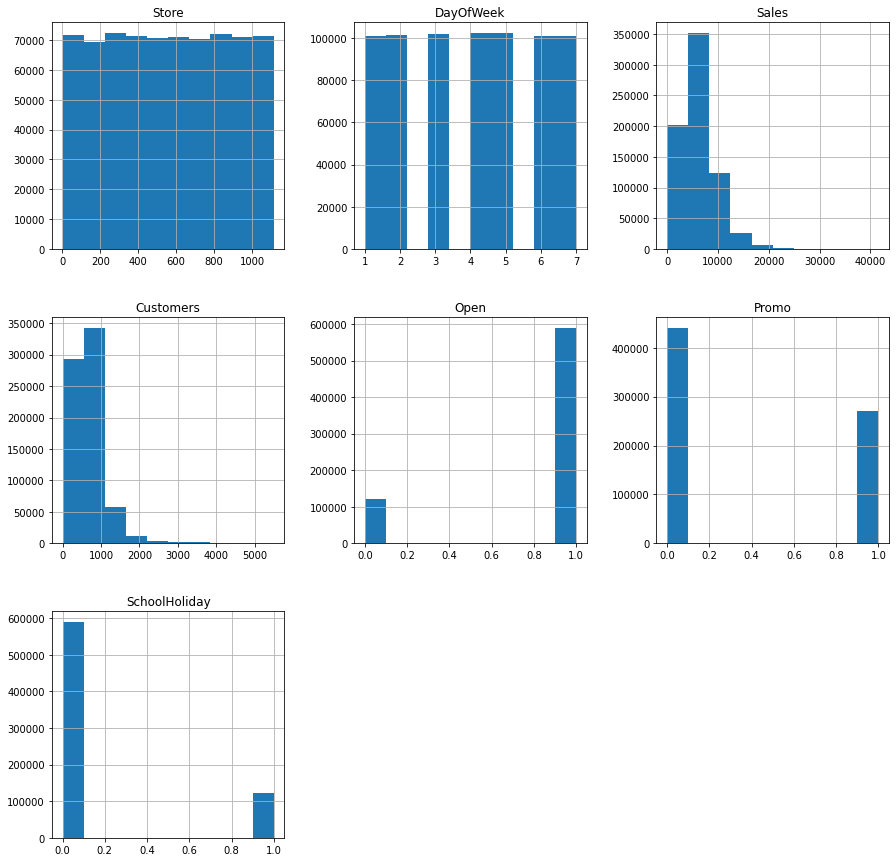

In [ ]:
df.hist(figsize=(15,15))

#lets try Linear regression and check

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores = cross_val_score(lr,X_std,Y,scoring='neg_root_mean_squared_error')
scores


array([-1.52286628e+03, -1.49284653e+03, -4.28125260e+15, -1.38795734e+03,
       -1.75989607e+16])

In [ ]:
scores = cross_val_score(lr,X_std,Y,scoring='neg_root_mean_squared_error',cv=3)
scores

array([-1.16808923e+15, -9.66537768e+15, -1.77855930e+15])

##Lets apply Lasso and remove some columns

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
alpha_values = {'alpha' : list(np.arange(-0.5,0.9,0.1))}
LassoCV = GridSearchCV(Lasso(),alpha_values,scoring='neg_root_mean_squared_error',cv = 3)

In [ ]:
LassoCV.fit(X_std,Y).best_params_

In [ ]:
Las1 = Lasso(alpha=0.9)
Las1.fit(X_std,Y)
best_Lasso_coeff = Las1.coef_
best_Lasso_coeff

array([-5.05670202e+01,  2.80202578e+03,  2.34813570e+02,  2.26386684e+01,
       -3.74701958e+01, -5.73459465e+01,  0.00000000e+00,  9.41939519e+01,
       -4.51135979e+02, -1.72341148e+02,  1.79377555e-11, -6.78856498e+02,
        2.13070419e-11, -0.00000000e+00,  1.14260572e+01, -2.61040097e+02,
       -1.88776583e+02, -1.35457938e+02, -3.20744239e+01,  3.71131613e-14,
        0.00000000e+00, -2.49553883e+00,  7.30991844e+01, -1.92943447e+01,
       -1.16494021e+01, -4.78109302e+00,  4.29116997e+01,  2.17103160e+01,
        5.23495650e+01,  0.00000000e+00, -2.23707465e+01, -2.61300786e+01,
       -4.38281650e+01,  3.37510758e+01,  2.34864738e+02,  4.10388462e+01,
        6.83448248e+01,  2.60158236e+01,  2.11986136e+01,  1.23160056e+01,
       -1.79398658e+01, -1.60065035e+01, -2.83634295e+01, -2.06036687e+01,
       -1.67485156e+01, -1.92563765e+01, -6.12347812e+00,  5.84778216e+00,
        5.25286095e+00,  2.73111298e+01,  3.62759004e+01,  7.69886868e+00,
        0.00000000e+00, -

In [ ]:
alpha_values = {'alpha' : list(np.arange(0.5,3.9,0.5))}
LassoCV = GridSearchCV(Lasso(),alpha_values,scoring='neg_root_mean_squared_error',cv = 3)

In [ ]:
LassoCV.fit(X_std,Y).best_params_

{'alpha': 3.5}

In [ ]:
Las1 = Lasso(alpha=3.5)
Las1.fit(X_std,Y)
best_Lasso_coeff = Las1.coef_
best_Lasso_coeff

array([-4.79683868e+01,  2.80113223e+03,  2.33032010e+02,  2.14254038e+01,
       -3.46220075e+01, -5.54221181e+01,  0.00000000e+00,  9.17418801e+01,
       -4.14276180e+02, -2.11537823e+02,  5.51563705e-12, -6.78844839e+02,
        1.08507766e-11, -0.00000000e+00,  2.33637959e+01, -2.38611358e+02,
       -1.74277810e+02, -1.22772182e+02, -2.76269352e+01,  0.00000000e+00,
        0.00000000e+00, -4.92933006e+00,  6.29664600e+01, -1.75504241e+01,
       -7.66677747e+00, -2.14258146e+00,  3.78213760e+01,  1.63472370e+01,
        4.72823170e+01,  0.00000000e+00, -1.60211967e+01, -2.21700006e+01,
       -4.65267924e+01,  2.57488352e+01,  2.27207143e+02,  3.84036598e+01,
        6.68918377e+01,  2.35247899e+01,  1.93259606e+01,  1.05315658e+01,
       -1.50592507e+01, -1.23933538e+01, -2.50521464e+01, -1.75095923e+01,
       -1.33724332e+01, -1.59593998e+01, -3.05800244e+00,  4.11498545e+00,
        3.53985852e+00,  2.56551449e+01,  3.47066096e+01,  6.25465434e+00,
        0.00000000e+00, -

## Lets try decision tree and check

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt = DecisionTreeRegressor()
scores = cross_val_score(dt,X,Y,scoring='neg_root_mean_squared_error',cv=7)
scores

array([-1040.03673351, -1088.48672901, -1298.63504344, -1034.64740235,
       -1136.53925372,  -924.17280657, -1359.75160355])

In [ ]:
xnew = X.drop('Customers',axis=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
scores = cross_val_score(dt,xnew,Y,scoring='neg_root_mean_squared_error',cv=7)
scores

array([-1244.93793641, -1522.06351377, -1486.11159516, -1296.60975549,
       -1461.41919182, -1240.50716021, -2097.5864181 ])

In [ ]:
for i in range(3,40):
  dt = DecisionTreeRegressor(max_depth=i)
  scores = cross_val_score(dt,X,Y,scoring='neg_root_mean_squared_error',cv=3)
  print(i,':',scores, sum(scores)/len(scores))

3 : [-1679.12587413 -1724.16748462 -1744.72286874] -1716.005409161711
4 : [-1556.06675508 -1589.4100681  -1605.5986364 ] -1583.6918198587898
5 : [-1464.05214465 -1495.86815296 -1505.18116721] -1488.367154938417
6 : [-1427.69061607 -1441.66527126 -1454.32851312] -1441.2281334821157
7 : [-1404.46650963 -1392.02876916 -1417.17302947] -1404.5561027529993
8 : [-1382.02543476 -1355.81886182 -1380.41509725] -1372.7531312755928
9 : [-1365.71602724 -1335.00689703 -1341.02518534] -1347.249369867222
10 : [-1345.72679991 -1312.4603422  -1327.95393622] -1328.7136927779586
11 : [-1319.17603845 -1294.20182653 -1300.99020457] -1304.7893565161705
12 : [-1297.27162754 -1277.41668838 -1277.34019232] -1284.0095027456548
13 : [-1279.2635033  -1273.82481491 -1249.73330205] -1267.607206751231
14 : [-1258.48828157 -1257.93699051 -1235.46705708] -1250.6307763874004
15 : [-1232.19474859 -1265.00742331 -1227.9754527 ] -1241.7258748662418
16 : [-1209.03385958 -1251.13038667 -1219.85960876] -1226.6746183392436
17 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
for i in range(20,30):
  dt = DecisionTreeRegressor(max_depth=i)
  scores = cross_val_score(dt,xnew,Y,scoring='neg_root_mean_squared_error',cv=7)
  print(i,':',scores,sum(scores)/len(scores))

20 : [-2227.02644481 -2284.61650779 -2422.42551231 -2169.03219063
 -2314.88811714 -2129.72141578 -2632.16124817] -2311.410205234623
21 : [-2178.66446458 -2231.82014799 -2367.77410172 -2139.31899248
 -2268.60250841 -2083.33684458 -2572.58871462] -2263.157967769902
22 : [-2116.9127287  -2232.10720577 -2439.93604687 -2089.61067183
 -2240.68570947 -2050.22056868 -2539.70900055] -2244.168847408555
23 : [-2061.3066368  -2195.71676144 -2417.2526427  -2039.01274058
 -2204.0251122  -1996.18796105 -2528.48495171] -2205.998115210063
24 : [-2034.93151569 -2139.44976188 -2410.86192612 -2004.13290349
 -2151.46248275 -1940.28377947 -2497.24057847] -2168.3375639796936
25 : [-1961.42665204 -2101.24041762 -2190.92777419 -1957.21914347
 -2109.26483491 -1892.07587832 -2429.41287255] -2091.6525104388206
27 : [-1870.16269307 -1940.18978754 -2102.40047067 -1876.41565526
 -2027.0402456  -1809.49508604 -2347.19272469] -1996.1280946982085
28 : [-1796.20773802 -1891.40633893 -2032.32977285 -1841.6221884
 -1984.9

In [ ]:
from sklearn.tree import DecisionTreeRegressor
for i in range(20,40):
  dt = DecisionTreeRegressor(max_depth=i)
  scores = cross_val_score(dt,X,Y,scoring='neg_root_mean_squared_error',cv=7)
  print(i,':',scores,sum(scores)/len(scores))

20 : [-1147.44854029 -1114.09843553 -1309.2382287  -1046.91285122
 -1156.64592283  -991.94030988 -1358.29250052] -1160.6538269974503
21 : [-1125.08564907 -1102.93776102 -1316.95330296 -1038.51295213
 -1146.52663773  -972.19598139 -1381.04722377] -1154.751358294639
22 : [-1110.54472122 -1088.5872011  -1305.86313634 -1036.51669154
 -1142.82687505  -967.5670325  -1352.37970467] -1143.4693374886467
23 : [-1099.5092666  -1082.05471912 -1298.40537798 -1033.12560709
 -1139.73977967  -948.78978596 -1362.61150402] -1137.7480057768153
24 : [-1089.93803594 -1083.03274134 -1299.93918605 -1034.19864116
 -1138.66358903  -940.7564268  -1380.12518283] -1138.093400451227
25 : [-1077.39564791 -1078.01155761 -1300.43625254 -1026.19675992
 -1135.57129393  -937.74818271 -1349.08025277] -1129.205706770747
26 : [-1071.99159674 -1073.60809572 -1307.22892519 -1034.09533488
 -1130.45641442  -932.53344158 -1356.35167851] -1129.4664981471453


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in np.arange(0.1,1,0.1):
  rf = RandomForestRegressor(max_features=i)
  scores = cross_val_score(rf,X,Y,scoring='neg_root_mean_squared_error',cv=2)
  print(i,':',scores,sum(scores)/len(scores))

0.1 : [-1289.18222202 -1273.15619934] -1281.1692106788987
0.2 : [-1253.62490196 -1217.67750457] -1235.6512032682072
0.30000000000000004 : [-1210.55010573 -1174.90276298] -1192.7264343548932
0.4 : [-1159.29398025 -1126.33316077] -1142.8135705104714
0.5 : [-1104.50328651 -1081.65752706] -1093.0804067823751
0.6 : [-1064.47957656 -1044.9748987 ] -1054.7272376296087
0.7000000000000001 : [-1021.83164957 -1006.7650701 ] -1014.2983598323415
0.8 : [-990.70277606 -977.88483012] -984.2938030931778
0.9 : [-957.98498344 -950.72106446] -954.3530239472063


In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in np.arange(1,6):
  rf = RandomForestRegressor()
  scores = cross_val_score(rf,X,Y,scoring='neg_root_mean_squared_error',cv=3)
  print(i,':',scores,sum(scores)/len(scores))

1 : [-865.01873511 -925.110394   -904.03311938] -898.0540828278912
2 : [-863.90580035 -927.1274507  -903.30141028] -898.1115537771817
3 : [-863.45978488 -926.05804945 -902.24825768] -897.2553640030892
4 : [-863.40922482 -927.33276364 -904.68806772] -898.4766853936184
5 : [-863.50810175 -925.67379574 -900.6783592 ] -896.6200855625133


In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in np.arange(100,201,20):
  rf = RandomForestRegressor(n_estimators=i)
  scores = cross_val_score(rf,X,Y,scoring='neg_root_mean_squared_error',cv=2)
  print(i,':',scores,sum(scores)/len(scores))

100 : [-933.99051351 -925.12221463] -929.5563640688779
120 : [-933.0993075  -924.30061962] -928.6999635618038


KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
scores = cross_val_score(sgd,X,Y,scoring='neg_root_mean_squared_error')
scores

array([-2.92612386e+13, -3.94695459e+13, -3.72648426e+13, -3.46929250e+13,
       -2.55371622e+13])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(100,170,20):
  gbr = GradientBoostingRegressor(n_estimators=i)
  scores = cross_val_score(gbr,X,Y,scoring='neg_root_mean_squared_error',cv=3)
  print(i,':',scores)

100 : [-1331.68873592 -1300.0526401  -1319.28951557]
120 : [-1313.58034388 -1285.21761395 -1307.29903164]
140 : [-1301.3272226 -1268.0144316 -1289.2590114]
160 : [-1287.05461856 -1254.62576156 -1274.14675117]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(200,370,50):
  gbr = GradientBoostingRegressor(n_estimators=i)
  scores = cross_val_score(gbr,X,Y,scoring='neg_root_mean_squared_error',cv=3)
  print(i,':',scores)

200 : [-1257.60875687 -1224.01423104 -1244.12529458]
250 : [-1226.48111901 -1187.52648373 -1218.17404036]
300 : [-1199.67832106 -1156.64739626 -1187.90928615]
350 : [-1171.12248715 -1132.44763941 -1154.56705623]


In [ ]:
print(dftest_cp1.columns)
print(df_cp1.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day'],
      dtype='object')


##Lets drop the customers column and check

In [21]:
Xnew = X.drop('Customers',axis=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dt = DecisionTreeRegressor()
scores = cross_val_score(dt,Xnew,Y,scoring='neg_root_mean_squared_error',cv=2)
scores

array([-1293.55351269, -1459.15905319])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
for i in range(30,71,5):
  dt = DecisionTreeRegressor(max_depth=i)
  scores = cross_val_score(dt,Xnew,Y,scoring='neg_root_mean_squared_error',cv=3)
  print(i,':',scores,sum(scores)/len(scores))

30 : [-1715.90690959 -1927.75009174 -1886.73448554] -1843.4638289559832
35 : [-1484.30533243 -1666.3412788  -1882.32793401] -1677.65818174775
40 : [-1399.25291499 -1540.03070792 -1660.85123755] -1533.3782868181179
45 : [-1318.49511563 -1488.31550835 -1576.52422637] -1461.111616783461
50 : [-1332.9330905  -1485.39186446 -1559.42091998] -1459.248624980134
55 : [-1399.07581938 -1467.67948888 -1782.87265375] -1549.87598733536
60 : [-1401.99556273 -1460.30085905 -1763.53692584] -1541.9444492054652
65 : [-1315.27393953 -1488.4457651  -1549.23269537] -1450.9841333317272
70 : [-1323.52314771 -1450.97719576 -1538.91819111] -1437.8061781923989


In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in np.arange(1,4):
  rf = RandomForestRegressor()
  scores = cross_val_score(rf,Xnew,Y,scoring='neg_root_mean_squared_error',cv=3)
  print(i,':',scores,sum(scores)/len(scores))

1 : [-1170.6759716  -1193.70578091 -1411.58819572] -1258.6566494097085
2 : [-1165.80650193 -1194.38577595 -1408.28065849] -1256.1576454552708
3 : [-1168.25478195 -1206.12281633 -1411.73010097] -1262.0358997480432


#Lets preprocess test set and take outputs

In [22]:
#convdt()
dftest_cp1.head()
convdt(dftest_cp1)
dftest_cp1.head()
dftest_cp1 = dftest_cp1.drop('Date',axis=1)
dftest_cp1.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,767,1,0,0,b,1,2013,4,1
1,1111,6,1,0,0,0,2013,3,16
2,45,4,1,1,0,1,2013,8,1
3,500,4,1,0,0,1,2013,5,23
4,82,2,1,0,0,1,2013,8,6


In [23]:
dftest_cp1 = pd.get_dummies(dftest_cp1,columns=[x for x in dftest_cp1.columns if x not in ['Store']])

In [24]:
dftest_cp1.head()

,Store,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,SchoolHoliday_0,SchoolHoliday_1,Year_2013,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,767,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1111,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,82,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
dc = [x for x in list(Xnew)if x not in list(dftest_cp1)]
dc

['StateHoliday_c', 'Year_2014', 'Year_2015', 'Month_11', 'Month_12']

In [26]:
ls = [x for x in list(dftest_cp1)if x not in list(Xnew)]
ls

[]

In [27]:
Xnew = Xnew.drop(dc,axis=1)

In [28]:
#[x for x in Xnew.columns if x not in dftest_cp1.columns]
len(Xnew.columns)
#len(dftest_cp1.columns)
#list(Xnew)
for a,b in zip(list(Xnew),list(dftest_cp1)):
  print(a,b)

Store Store
DayOfWeek_1 DayOfWeek_1
DayOfWeek_2 DayOfWeek_2
DayOfWeek_3 DayOfWeek_3
DayOfWeek_4 DayOfWeek_4
DayOfWeek_5 DayOfWeek_5
DayOfWeek_6 DayOfWeek_6
DayOfWeek_7 DayOfWeek_7
Open_0 Open_0
Open_1 Open_1
Promo_0 Promo_0
Promo_1 Promo_1
StateHoliday_0 StateHoliday_0
StateHoliday_a StateHoliday_a
StateHoliday_b StateHoliday_b
SchoolHoliday_0 SchoolHoliday_0
SchoolHoliday_1 SchoolHoliday_1
Year_2013 Year_2013
Month_1 Month_1
Month_2 Month_2
Month_3 Month_3
Month_4 Month_4
Month_5 Month_5
Month_6 Month_6
Month_7 Month_7
Month_8 Month_8
Month_9 Month_9
Month_10 Month_10
Day_1 Day_1
Day_2 Day_2
Day_3 Day_3
Day_4 Day_4
Day_5 Day_5
Day_6 Day_6
Day_7 Day_7
Day_8 Day_8
Day_9 Day_9
Day_10 Day_10
Day_11 Day_11
Day_12 Day_12
Day_13 Day_13
Day_14 Day_14
Day_15 Day_15
Day_16 Day_16
Day_17 Day_17
Day_18 Day_18
Day_19 Day_19
Day_20 Day_20
Day_21 Day_21
Day_22 Day_22
Day_23 Day_23
Day_24 Day_24
Day_25 Day_25
Day_26 Day_26
Day_27 Day_27
Day_28 Day_28
Day_29 Day_29
Day_30 Day_30
Day_31 Day_31


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xnew,Y)
ypred = rf.predict(dftest_cp1)

In [ ]:
pd.DataFrame(ypred)
dftest_cp1.head()

,Store,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,SchoolHoliday_0,SchoolHoliday_1,Year_2013,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,767,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1111,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,82,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
output(ypred,'rf.csv')

##Lets check the Random Forest model for this processed Training set

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y)

In [33]:
xtrain.shape
xtest.shape

(178012, 59)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mser
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
rmse = np.sqrt(mser(ytest,ypred))
rmse


1806.9207340637952

In [40]:
ypred_train1 = rf.predict(xtrain)
err1 = ytrain - ypred_train1
err1

251762   -116.61
412731    269.92
466438   -451.76
374872    110.23
372319    111.35
           ...  
648190   -279.20
300816   -248.81
377732    -64.72
597395      0.00
581353      0.00
Name: Sales, Length: 534034, dtype: float64

In [41]:
rmse1 = np.sqrt(mser(ytrain,ypred_train1))
rmse1

679.5022246882236

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain,err1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
ypred_train2 = dt.predict(xtrain)
err2 = err1 - ypred_train2
rmse2 = np.sqrt(mser(err1,ypred_train2))
rmse2

0.0

In [45]:
ypred_tnet1 = ypred_train1 + ypred_train2
rmse = np.sqrt(mser(ytrain,ypred_tnet1)) 
rmse

0.0

In [46]:
#apply this on test split
ypred = rf.predict(xtest)
ypred_err = dt.predict(xtest)
ypred_testnet = ypred + ypred_err
rmse_test = np.sqrt(mser(ytest,ypred_testnet))
rmse_test

1590.476257792698

##Lets build a full model

In [47]:
rf = RandomForestRegressor()
rf.fit(Xnew,Y)
full_ypred1 = rf.predict(Xnew)
full_err1 = Y - full_ypred1


In [48]:
dt = DecisionTreeRegressor()
dt.fit(Xnew,full_err1)
full_ypred2 = dt.predict(Xnew)

In [49]:
net_ypred = full_ypred1 + full_ypred2
rmse = np.sqrt(mser(Y,net_ypred))
rmse

0.0

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xnew,full_err1)
full_ypred2 = lr.predict(Xnew)

In [61]:
net_ypred1 = full_ypred1 + full_ypred2
full_err2 = Y - net_ypred1
rmse = np.sqrt(mser(Y,net_ypred))
rmse

645.3338109887884

In [63]:
lr2 = LinearRegression()
lr2.fit(Xnew,full_err2)
full_ypred3 = lr.predict(Xnew)

In [64]:
net_ypred2 = full_ypred1 + full_ypred2 + full_ypred3
full_err3 = Y - net_ypred2
rmse = np.sqrt(mser(Y,net_ypred2))
rmse

645.6586714997611

##Lets pass test dataset to this full model

In [51]:
tstpred1 = rf.predict(dftest_cp1)
tstpred2 = dt.predict(dftest_cp1)
tstpred_net = tstpred1 + tstpred2

In [52]:
output(tstpred_net,'rf_boost.csv')

In [50]:
dftest_cp1.head()

,Store,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Open_0,Open_1,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,SchoolHoliday_0,SchoolHoliday_1,Year_2013,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,767,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1111,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,82,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
tstpred1 = rf.predict(dftest_cp1)
tstpred2 = lr.predict(dftest_cp1)
tstpred3 = lr2.predict(dftest_cp1)
tstpred_net = tstpred1 + tstpred2 + tstpred2

In [66]:
output(tstpred_net,'rf_lr_boost1.csv')